In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
columns1 = ['home_own_white', 'home_own_black', 'home_own_native', 'home_own_asian', 
                    'home_own_islander', 'home_own_other_race', 'home_own_2race', 'home_own_hispanic', 'home_own_age_35_lt', 
                    'home_own_age_35_44', 'home_own_age_45_54', 'home_own_age_55_64', 'home_own_age_65_74', 'home_own_age_75_84', 'home_own_age_85_ge', 
                    'home_own_ed_hs_lt', 'home_own_ed_hs', 'home_own_ed_aa_le', 'home_own_ed_ba_ge', 'home_own_yrs_00_03_lt', 
                    'home_own_yrs_03_04', 'home_own_yrs_05_09', 'home_own_yrs_10_19', 'home_own_yrs_20_29', 'home_own_yrs_30_ge',
            'rent_white', 'rent_black', 'rent_native', 'rent_asian', 'rent_islander', 'rent_other_race', 'rent_2race', 'rent_hispanic', 
                    'rent_age_35_lt', 'rent_age_35_44', 'rent_age_45_54', 'rent_age_55_64', 'rent_age_65_74', 'rent_age_75_84', 'rent_age_85_ge', 
                    'rent_ed_hs_lt', 'rent_ed_hs', 'rent_ed_aa_le', 'rent_ed_ba_ge', 'rent_yrs_00_03_lt', 'rent_yrs_03_04', 'rent_yrs_05_09', 'rent_yrs_10_19', 
                    'rent_yrs_20_29', 'rent_yrs_30_ge', 'home_own_hh_size_1', 'home_own_hh_size_2', 'home_own_hh_size_3', 'home_own_hh_size_4', 'home_own_hh_size_5', 
                    'home_own_hh_size_6', 'home_own_hh_size_7_ge', 'rent_hh_size_1', 'rent_hh_size_2', 'rent_hh_size_3', 'rent_hh_size_4', 'rent_hh_size_5', 
                    'rent_hh_size_6', 'rent_hh_size_7_ge', 'home_own_hh_inc_000_005k', 'home_own_hh_inc_005_010k', 'home_own_hh_inc_010_015k', 'home_own_hh_inc_015_020k', 
                    'home_own_hh_inc_020_025k', 'home_own_hh_inc_025_035k', 'home_own_hh_inc_035_050k', 'home_own_hh_inc_050_075k', 
                    'home_own_hh_inc_075_100k', 'home_own_hh_inc_100_150k', 'home_own_hh_inc_150k_ge', 
                    'rent_hh_inc_000_005k', 'rent_hh_inc_005_010k', 'rent_hh_inc_010_015k', 'rent_hh_inc_015_020k', 'rent_hh_inc_020_025k', 'rent_hh_inc_025_035k', 
                    'rent_hh_inc_035_050k', 'rent_hh_inc_050_075k', 'rent_hh_inc_075_100k', 'rent_hh_inc_100_150k', 'rent_hh_inc_150k_ge', 
                    'home_own_children_present', 'rent_children_present', 
                    'vacant_home_owned', 'vacant_rented', 'home_value_0000_0049k', 'home_value_0050_0099k', 'home_value_0100_0149k', 'home_value_0150_0199k', 
                    'home_value_0200_0299k', 'home_value_0300_0499k', 'home_value_0500_0999k', 'home_value_1000k_GE', 'home_mortgage_yes', 'home_own_rate']

extra_columns = ['county_type','state_code','employed', 'hh_urban_area', 'hh_urban_connect', 'hh_rural', 
                    'hh_median_income', 'home_own_hh_median_income', 'rent_hh_median_income', 'income_per_person', 
                    'population', 'county_gdp']

columns = extra_columns+columns1

In [3]:
data = pd.read_csv("https://raw.github.iu.edu/dsci-d592/Project_Home_Ownership/main/Prepared_data/Home_Own_County_db_2019_new.csv?token=GHSAT0AAAAAAAAARL3F5JX53Z5LURCKMXN2Y4LPYIQ")

In [5]:
#copying the data into another variable so that we don't accidently change the main data
df = data.copy(deep= True)
df = df[columns]
df.shape

(3111, 112)

In [6]:
df['home_own_inc_000_025k'] = df['home_own_hh_inc_000_005k']+ df['home_own_hh_inc_005_010k']+ \
    df['home_own_hh_inc_010_015k']+ df['home_own_hh_inc_015_020k']+df['home_own_hh_inc_020_025k']

df['home_own_hh_inc_025_050k'] = df['home_own_hh_inc_025_035k'] + df['home_own_hh_inc_035_050k']

df['rent_hh_inc_000_025k'] = df['rent_hh_inc_000_005k'] + df['rent_hh_inc_005_010k'] + \
        df['rent_hh_inc_010_015k']+ df['rent_hh_inc_015_020k']+ df['rent_hh_inc_020_025k']

df['rent_hh_inc_025_050k'] =df['rent_hh_inc_025_035k']+df['rent_hh_inc_035_050k']

df['home_value_0000_0099k'] = df['home_value_0000_0049k'] + df['home_value_0050_0099k']

df['employment_rate'] = df['employed']/df['population']

del_col =['home_own_hh_inc_000_005k', 'home_own_hh_inc_005_010k', 'home_own_hh_inc_010_015k', 'home_own_hh_inc_015_020k', 
          'home_own_hh_inc_020_025k', 'home_own_hh_inc_025_035k', 'home_own_hh_inc_035_050k','rent_hh_inc_000_005k',
          'rent_hh_inc_005_010k', 'rent_hh_inc_010_015k', 'rent_hh_inc_015_020k', 'rent_hh_inc_020_025k',
          'rent_hh_inc_025_035k', 'rent_hh_inc_035_050k','home_value_0000_0049k', 'home_value_0050_0099k',
          'employed', 'population']



df = df.drop(del_col, axis=1)

In [7]:
X =df.drop(['home_own_rate', 'state_code','county_type'],axis =1)
y = df['home_own_rate']

numerical_cols = X.select_dtypes(include=np.number).columns

X = pd.get_dummies(X, drop_first=True)
# Lookinng at the numerical columns of the data
# NOTE: we don't have any categorical columns in the data

X = X.fillna(0)
X.head(2)

,hh_urban_area,hh_urban_connect,hh_rural,hh_median_income,home_own_hh_median_income,rent_hh_median_income,income_per_person,county_gdp,home_own_white,home_own_black,home_own_native,home_own_asian,home_own_islander,home_own_other_race,home_own_2race,home_own_hispanic,home_own_age_35_lt,home_own_age_35_44,home_own_age_45_54,home_own_age_55_64,home_own_age_65_74,home_own_age_75_84,home_own_age_85_ge,home_own_ed_hs_lt,home_own_ed_hs,home_own_ed_aa_le,home_own_ed_ba_ge,home_own_yrs_00_03_lt,home_own_yrs_03_04,home_own_yrs_05_09,home_own_yrs_10_19,home_own_yrs_20_29,home_own_yrs_30_ge,rent_white,rent_black,rent_native,rent_asian,rent_islander,rent_other_race,rent_2race,rent_hispanic,rent_age_35_lt,rent_age_35_44,rent_age_45_54,rent_age_55_64,rent_age_65_74,rent_age_75_84,rent_age_85_ge,rent_ed_hs_lt,rent_ed_hs,rent_ed_aa_le,rent_ed_ba_ge,rent_yrs_00_03_lt,rent_yrs_03_04,rent_yrs_05_09,rent_yrs_10_19,rent_yrs_20_29,rent_yrs_30_ge,home_own_hh_size_1,home_own_hh_size_2,home_own_hh_size_3,home_own_hh_size_4,home_own_hh_size_5,home_own_hh_size_6,home_own_hh_size_7_ge,rent_hh_size_1,rent_hh_size_2,rent_hh_size_3,rent_hh_size_4,rent_hh_size_5,rent_hh_size_6,rent_hh_size_7_ge,home_own_hh_inc_050_075k,home_own_hh_inc_075_100k,home_own_hh_inc_100_150k,home_own_hh_inc_150k_ge,rent_hh_inc_050_075k,rent_hh_inc_075_100k,rent_hh_inc_100_150k,rent_hh_inc_150k_ge,home_own_children_present,rent_children_present,vacant_home_owned,vacant_rented,home_value_0100_0149k,home_value_0150_0199k,home_value_0200_0299k,home_value_0300_0499k,home_value_0500_0999k,home_value_1000k_GE,home_mortgage_yes,home_own_inc_000_025k,home_own_hh_inc_025_050k,rent_hh_inc_000_025k,rent_hh_inc_025_050k,home_value_0000_0099k,employment_rate
0,12511.18,0.0,9059.82,58731.0,65812.0,42519.0,44368,1737286.0,13689.0,2366,14,20,0,7,113,361.0,2001.0,2275.0,2921.0,3513.0,2744.0,1659.0,472.0,1381.0,4866.0,4572.0,4925.0,2885.0,1551.0,2388.0,4841.0,2348.0,2490.0,4315.0,1945,0,34,0,2,32,171.0,2310.0,1434.0,725.0,639.0,380.0,211.0,197.0,893.0,1820.0,1703.0,1460.0,3122.0,1308.0,1157.0,462.0,163.0,147.0,3392.0,6151.0,2820.0,1827.0,882.0,521.0,91.0,1912.0,1737.0,812.0,789.0,459.0,83.0,31.0,2772.0,2140.0,3326.0,1855.0,1216.0,894.0,574.0,210.0,4214.0,2003.0,0.0,0.0,2743.0,3123.0,3553.0,1964.0,242.0,17.0,10019.0,2639.0,3203.0,1903.0,1276.0,4496.0,0.458337
1,28747.89,18770.1,34807.01,56439.0,66180.0,40932.0,48270,7223316.0,56983.0,5032,361,557,0,187,585,1719.0,7208.0,7639.0,12811.0,14465.0,14700.0,7284.0,1190.0,4657.0,14303.0,22136.0,24201.0,12420.0,7317.0,11214.0,17968.0,8668.0,7710.0,14686.0,1340,103,86,0,84,106,945.0,4153.0,3579.0,3505.0,2258.0,1411.0,1264.0,858.0,1473.0,5165.0,4699.0,5691.0,9842.0,2952.0,2158.0,1243.0,641.0,192.0,17481.0,27128.0,10030.0,5594.0,3717.0,1250.0,97.0,7846.0,4142.0,2808.0,1131.0,429.0,433.0,239.0,9267.0,9878.0,10940.0,8912.0,2322.0,1091.0,2201.0,545.0,13096.0,5094.0,3.4,51.1,6324.0,11921.0,16038.0,13719.0,5865.0,1739.0,36074.0,10113.0,16187.0,4904.0,5965.0,9691.0,0.423649


In [8]:
from collections import Counter, OrderedDict

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, SparsePCA


from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering

from sklearn.manifold import TSNE


In [ ]:
# !pip install umap

In [9]:
#Scaling
scaler = StandardScaler()
scaler.fit(X)
scaled_df = pd.DataFrame(scaler.transform(X),columns= X.columns, index=X.index )
print("All features are now scaled")

All features are now scaled


In [10]:
scaled_df.head()

,hh_urban_area,hh_urban_connect,hh_rural,hh_median_income,home_own_hh_median_income,rent_hh_median_income,income_per_person,county_gdp,home_own_white,home_own_black,home_own_native,home_own_asian,home_own_islander,home_own_other_race,home_own_2race,home_own_hispanic,home_own_age_35_lt,home_own_age_35_44,home_own_age_45_54,home_own_age_55_64,home_own_age_65_74,home_own_age_75_84,home_own_age_85_ge,home_own_ed_hs_lt,home_own_ed_hs,home_own_ed_aa_le,home_own_ed_ba_ge,home_own_yrs_00_03_lt,home_own_yrs_03_04,home_own_yrs_05_09,home_own_yrs_10_19,home_own_yrs_20_29,home_own_yrs_30_ge,rent_white,rent_black,rent_native,rent_asian,rent_islander,rent_other_race,rent_2race,rent_hispanic,rent_age_35_lt,rent_age_35_44,rent_age_45_54,rent_age_55_64,rent_age_65_74,rent_age_75_84,rent_age_85_ge,rent_ed_hs_lt,rent_ed_hs,rent_ed_aa_le,rent_ed_ba_ge,rent_yrs_00_03_lt,rent_yrs_03_04,rent_yrs_05_09,rent_yrs_10_19,rent_yrs_20_29,rent_yrs_30_ge,home_own_hh_size_1,home_own_hh_size_2,home_own_hh_size_3,home_own_hh_size_4,home_own_hh_size_5,home_own_hh_size_6,home_own_hh_size_7_ge,rent_hh_size_1,rent_hh_size_2,rent_hh_size_3,rent_hh_size_4,rent_hh_size_5,rent_hh_size_6,rent_hh_size_7_ge,home_own_hh_inc_050_075k,home_own_hh_inc_075_100k,home_own_hh_inc_100_150k,home_own_hh_inc_150k_ge,rent_hh_inc_050_075k,rent_hh_inc_075_100k,rent_hh_inc_100_150k,rent_hh_inc_150k_ge,home_own_children_present,rent_children_present,vacant_home_owned,vacant_rented,home_value_0100_0149k,home_value_0150_0199k,home_value_0200_0299k,home_value_0300_0499k,home_value_0500_0999k,home_value_1000k_GE,home_mortgage_yes,home_own_inc_000_025k,home_own_hh_inc_025_050k,rent_hh_inc_000_025k,rent_hh_inc_025_050k,home_value_0000_0099k,employment_rate
0,-0.133835,-0.685690,0.208032,0.314409,0.065368,0.824045,-0.078576,-0.168770,-0.171582,0.042569,-0.206430,-0.140768,-0.091511,-0.172418,-0.185291,-0.141190,-0.083739,-0.152270,-0.140491,-0.149209,-0.173580,-0.139386,-0.167521,-0.078606,-0.078093,-0.160839,-0.165064,-0.097055,-0.153047,-0.144437,-0.098922,-0.157920,-0.156608,-0.210189,-0.065048,-0.245617,-0.117100,-0.095963,-0.149839,-0.216675,-0.131301,-0.140581,-0.114352,-0.153208,-0.168282,-0.179099,-0.177143,-0.139808,-0.108430,-0.156863,-0.176948,-0.127661,-0.158721,-0.114736,-0.115851,-0.133650,-0.090520,-0.074091,-0.163362,-0.151704,-0.104118,-0.158434,-0.140740,-0.033589,-0.188770,-0.173952,-0.141071,-0.147704,-0.108738,-0.083044,-0.148362,-0.158959,-0.153303,-0.166282,-0.115939,-0.177432,-0.130144,-0.086749,-0.107315,-0.106842,-0.128912,-0.124091,-0.458895,-0.451194,-0.024644,-0.028738,-0.114580,-0.188669,-0.148422,-0.110362,-0.128471,-0.038429,-0.114206,-0.160678,-0.183687,0.042605,0.024639
1,0.004808,2.800088,3.944871,0.158981,0.085421,0.676318,0.223190,0.012282,0.869548,0.365531,0.402946,-0.074782,-0.091511,1.251760,0.257183,-0.054722,0.757493,0.340143,0.593951,0.572333,0.823097,0.721879,0.119152,0.464116,0.708076,0.790326,0.446236,0.828938,0.688416,0.686127,0.675208,0.424633,0.284283,0.256499,-0.112686,-0.009109,-0.108697,-0.095963,0.128008,-0.161418,-0.092414,-0.039660,0.063185,0.133394,0.041071,0.029568,0.225747,0.339119,-0.047670,0.114105,0.013945,0.084274,0.103954,0.066714,-0.019402,-0.033450,0.059244,-0.055679,0.800949,0.764748,0.547653,0.213436,0.446110,0.338323,-0.184799,0.122025,0.014287,0.085691,-0.056425,-0.091384,0.068569,0.039444,0.481029,0.708299,0.448329,0.185767,-0.019690,-0.056408,0.126981,-0.053515,0.367624,0.075153,3.498964,13.343050,0.533782,1.059758,0.767324,0.451586,0.123535,0.083759,0.467279,1.093899,1.247026,0.044396,0.165578,0.710654,0.024440
2,-0.240666,-0.122155,-0.179963,-1.462707,-1.074146,-1.461589,-0.758826,-0.198553,-0.413432,0.020158,-0.213454,-0.142243,-0.091511,-0.188242,-0.257474,-0.159910,-0.321552,-0.322466,-0.280622,-0.294018,-0.287452,-0.260499,-0.276521,-0.146860,-0.320600,-0.317940,-0.286684,-0.325470,-0.285556,-0.317777,-0.297895,-0.266780,-0.253316,-0.345412,-0.036860,-0.245617,-0.120816,-0.095963,-0.085460,-0.203234,-0.130246,-0.195395,

In [11]:
scaled_df.describe().round(5)

,hh_urban_area,hh_urban_connect,hh_rural,hh_median_income,home_own_hh_median_income,rent_hh_median_income,income_per_person,county_gdp,home_own_white,home_own_black,home_own_native,home_own_asian,home_own_islander,home_own_other_race,home_own_2race,home_own_hispanic,home_own_age_35_lt,home_own_age_35_44,home_own_age_45_54,home_own_age_55_64,home_own_age_65_74,home_own_age_75_84,home_own_age_85_ge,home_own_ed_hs_lt,home_own_ed_hs,home_own_ed_aa_le,home_own_ed_ba_ge,home_own_yrs_00_03_lt,home_own_yrs_03_04,home_own_yrs_05_09,home_own_yrs_10_19,home_own_yrs_20_29,home_own_yrs_30_ge,rent_white,rent_black,rent_native,rent_asian,rent_islander,rent_other_race,rent_2race,rent_hispanic,rent_age_35_lt,rent_age_35_44,rent_age_45_54,rent_age_55_64,rent_age_65_74,rent_age_75_84,rent_age_85_ge,rent_ed_hs_lt,rent_ed_hs,rent_ed_aa_le,rent_ed_ba_ge,rent_yrs_00_03_lt,rent_yrs_03_04,rent_yrs_05_09,rent_yrs_10_19,rent_yrs_20_29,rent_yrs_30_ge,home_own_hh_size_1,home_own_hh_size_2,home_own_hh_size_3,home_own_hh_size_4,home_own_hh_size_5,home_own_hh_size_6,home_own_hh_size_7_ge,rent_hh_size_1,rent_hh_size_2,rent_hh_size_3,rent_hh_size_4,rent_hh_size_5,rent_hh_size_6,rent_hh_size_7_ge,home_own_hh_inc_050_075k,home_own_hh_inc_075_100k,home_own_hh_inc_100_150k,home_own_hh_inc_150k_ge,rent_hh_inc_050_075k,rent_hh_inc_075_100k,rent_hh_inc_100_150k,rent_hh_inc_150k_ge,home_own_children_present,rent_children_present,vacant_home_owned,vacant_rented,home_value_0100_0149k,home_value_0150_0199k,home_value_0200_0299k,home_value_0300_0499k,home_value_0500_0999k,home_value_1000k_GE,home_mortgage_yes,home_own_inc_000_025k,home_own_hh_inc_025_050k,rent_hh_inc_000_025k,rent_hh_inc_025_050k,home_value_0000_0099k,employment_rate
count,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000,3111.00000
mean,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000
std,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,1.00016,

In [12]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=0.95 )
pca.fit(scaled_df)

PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col"+str(i+1) for i in range(pca.n_components_)]),
                      index=scaled_df.index)
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,3111.0,0.000000e+00,8.445830,-2.968086,-2.513831,-2.078435,-0.766217,242.269263
col2,3111.0,-9.135876e-18,2.534286,-27.203967,-0.344710,0.564262,0.899329,70.556921
col3,3111.0,6.395113e-17,1.895975,-20.789953,-0.982677,-0.221051,0.634354,20.943358
col4,3111.0,9.135876e-18,1.561906,-30.628861,-0.362078,0.080082,0.432649,40.319304
col5,3111.0,2.283969e-17,1.350711,-12.366606,-0.284933,0.374218,0.659663,13.175339
col6,3111.0,0.000000e+00,1.221049,-18.571695,-0.152372,0.005670,0.140532,42.622479
col7,3111.0,0.000000e+00,1.129145,-13.913203,-0.273059,0.013147,0.206903,17.262372
col8,3111.0,-3.654350e-17,1.049748,-13.852644,-0.433122,-0.052699,0.362445,13.878446
col9,3111.0,4.567938e-18,1.004338,-2.210452,-0.098933,-0.004679,0.071749,51.975422
col10,3111.0,-2.740763e-17,0.946226,-7.720996,-0.326785,-0.070886,0.383812,8.993607


In [13]:
PCA_df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12
0,-1.226557,-0.038479,0.313444,-0.321735,0.580291,0.051200,0.052531,0.342347,-0.025196,0.050975,-0.274135,-0.537359
1,3.557351,-5.860941,1.890166,-1.360224,-8.696842,0.993459,-3.481357,-1.585145,0.670604,-5.100650,1.506058,2.659866
2,-2.281386,0.989062,-1.893090,0.626047,0.228208,0.213354,-0.123929,-0.679920,0.054912,0.031092,0.295597,0.259245
3,-2.410141,0.840514,-1.159705,0.475144,0.397388,0.095945,-0.128080,-0.336867,0.104890,-0.043212,0.219691,0.131111
4,-1.351192,-0.189644,-0.818822,0.393827,-0.257489,-0.049092,-0.577246,-0.714743,0.128001,0.431547,-0.053912,-0.792331


In [14]:
pca.explained_variance_ratio_

array([0.73514548, 0.06619114, 0.03704706, 0.02514193, 0.01880242,
       0.01536579, 0.01313978, 0.01135688, 0.01039557, 0.00922738,
       0.00778968, 0.0058157 ])

In [15]:
comp_df = pd.DataFrame(pca.components_,columns=X.columns, index = ["PC-"+str(i+1) for i in range(pca.n_components_)])
comp_df

,hh_urban_area,hh_urban_connect,hh_rural,hh_median_income,home_own_hh_median_income,rent_hh_median_income,income_per_person,county_gdp,home_own_white,home_own_black,home_own_native,home_own_asian,home_own_islander,home_own_other_race,home_own_2race,home_own_hispanic,home_own_age_35_lt,home_own_age_35_44,home_own_age_45_54,home_own_age_55_64,home_own_age_65_74,home_own_age_75_84,home_own_age_85_ge,home_own_ed_hs_lt,home_own_ed_hs,home_own_ed_aa_le,home_own_ed_ba_ge,home_own_yrs_00_03_lt,home_own_yrs_03_04,home_own_yrs_05_09,home_own_yrs_10_19,home_own_yrs_20_29,home_own_yrs_30_ge,rent_white,rent_black,rent_native,rent_asian,rent_islander,rent_other_race,rent_2race,rent_hispanic,rent_age_35_lt,rent_age_35_44,rent_age_45_54,rent_age_55_64,rent_age_65_74,rent_age_75_84,rent_age_85_ge,rent_ed_hs_lt,rent_ed_hs,rent_ed_aa_le,rent_ed_ba_ge,rent_yrs_00_03_lt,rent_yrs_03_04,rent_yrs_05_09,rent_yrs_10_19,rent_yrs_20_29,rent_yrs_30_ge,home_own_hh_size_1,home_own_hh_size_2,home_own_hh_size_3,home_own_hh_size_4,home_own_hh_size_5,home_own_hh_size_6,home_own_hh_size_7_ge,rent_hh_size_1,rent_hh_size_2,rent_hh_size_3,rent_hh_size_4,rent_hh_size_5,rent_hh_size_6,rent_hh_size_7_ge,home_own_hh_inc_050_075k,home_own_hh_inc_075_100k,home_own_hh_inc_100_150k,home_own_hh_inc_150k_ge,rent_hh_inc_050_075k,rent_hh_inc_075_100k,rent_hh_inc_100_150k,rent_hh_inc_150k_ge,home_own_children_present,rent_children_present,vacant_home_owned,vacant_rented,home_value_0100_0149k,home_value_0150_0199k,home_value_0200_0299k,home_value_0300_0499k,home_value_0500_0999k,home_value_1000k_GE,home_mortgage_yes,home_own_inc_000_025k,home_own_hh_inc_025_050k,rent_hh_inc_000_025k,rent_hh_inc_025_050k,home_value_0000_0099k,employment_rate
PC-1,0.117787,0.011667,0.031692,0.038238,0.048309,0.038062,0.033307,0.106101,0.103793,0.086784,0.041244,0.097460,0.043310,0.102285,0.105269,0.099268,0.108920,0.113737,0.115295,0.115665,0.114485,0.112391,0.111764,0.109685,0.108850,0.112530,0.112966,0.108685,0.110126,0.113650,0.115005,0.115669,0.111705,0.105969,0.094912,0.067845,0.096821,0.047913,0.082704,0.106944,0.103044,0.114413,0.115006,0.114069,0.114193,0.112517,0.110447,0.111058,0.108243,0.114540,0.116458,0.109769,0.115257,0.116440,0.112986,0.105359,0.090816,0.073363,0.112905,0.112896,0.115613,0.114591,0.114045,0.111883,0.109194,0.113706,0.115154,0.114324,0.112941,0.111306,0.108925,0.106675,0.112179,0.113344,0.114319,0.110554,0.116008,0.114960,0.110626,0.093447,0.113068,0.114920,0.038317,0.034910,0.073609,0.080985,0.089636,0.102116,0.097684,0.083649,0.115062,0.109186,0.109675,0.112867,0.115565,0.074208,0.000798
PC-2,0.002481,-0.073764,-0.170601,-0.093232,-0.085730,-0.054271,-0.034984,0.068947,-0.140637,-0.068331,-0.052365,0.126413,0.065502,0.004615,-0.007438,0.022487,-0.129740,-0.084446,-0.065456,-0.066106,-0.077583,-0.073444,-0.041869,-0.002868,-0.124396,-0.100127,-0.055957,-0.129271,-0.119664,-0.085662,-0.080412,-0.048509,-0.014766,0.010961,-0.013356,-0.031040,0.184347,0.068963,0.137251,0.088112,0.130468,0.032254,0.079848,0.089372,0.084587,0.090720,0.091864,0.055792,0.122596,0.026614,0.018604,0.102638,-0.002167,0.045636,0.102712,0.158675,0.213451,0.203307,-0.092856,-0.105557,-0.056639,-0.049514,-0.047269,-0.023875,0.035032,0.039117,0.070444,0.083889,0.095283,0.096108,0.099892,0.112572,-0.114879,-0.103650,-0.076800,-0.006161,0.048921,0.080848,0.124937,0.172995,-0.083298,0.061948,-0.142604,-0.153959,-0.214129,-0.227808,-0.215025,-0.094364,0.127327,0.186422,-0.066796,-0.102038,-0.125997,0.041760,0.019317,-0.182971,-0.003112
PC-3,-0.013178,0.066930,0.064678,0.424012,0.397813,0.382032,0.355887,0.049090,0.056139,-0.128843,-0.036306,0.115966,0.141337,-0.048630,0.073654,-0.087316,-0.004600,0.019557,0.023854,0.016984,0.012210,0.002856,0.007769,-0.100429,-0.048416,-0.003021,0.069667,0.020257,0.024050,0.022729,0.011263,0.010834,0.003144,0.035453,-0.136512,-0.032058,0.073678,0.147301,-0.028957,0.045638,-0.062624,-0.030746,-0.028360,-0.035983,-0.037289,-0.030011,-0.008990,0.018689,-0.070919,-0.07153

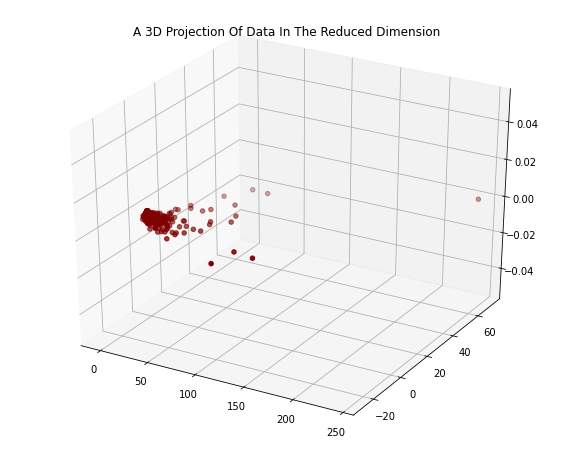

In [16]:
#A 3D Projection Of Data In The Reduced Dimension



x =PCA_df["col1"].head(300000)
y =PCA_df["col2"].head(300000)
z =PCA_df["col3"].head(300000)
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d' )
ax.scatter(x,y, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [24]:
from sklearn.manifold import TSNE

n_comp = 3
#Initiating PCA to reduce dimentions aka features to 3
tsne = TSNE(n_components=n_comp)


TSNE_df = pd.DataFrame(tsne.fit_transform(scaled_df), columns=(["col"+str(i+1) for i in range(n_comp)]),
                      index=scaled_df.index)
# TSNE_df.describe().T

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [25]:
TSNE_df.head()

,col1,col2,col3
0,-2.902190,-1.051243,1.514409
1,-16.186317,3.339061,-9.459051
2,14.174858,11.351295,-1.202270
3,16.221481,3.179865,0.726007
4,-0.197994,6.716533,-1.562962


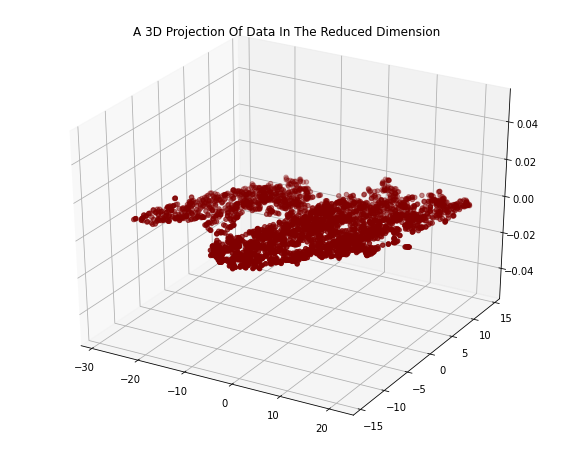

In [26]:
#A 3D Projection Of Data In The Reduced Dimension



x =TSNE_df["col1"]
y =TSNE_df["col2"]
z =TSNE_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d' )
ax.scatter(x,y, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

scores = []
distortions = []


for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, random_state=42)
    cluster_labels = clusterer.fit_predict(TSNE_df)

    silhouette_avg = silhouette_score(TSNE_df, cluster_labels)
    distortions.append(clusterer.inertia_)
    
    scores.append(silhouette_avg)

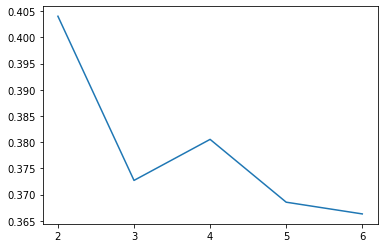

In [28]:
sns.lineplot(x = range_n_clusters, y = scores)
plt.xticks(range_n_clusters)
plt.show()

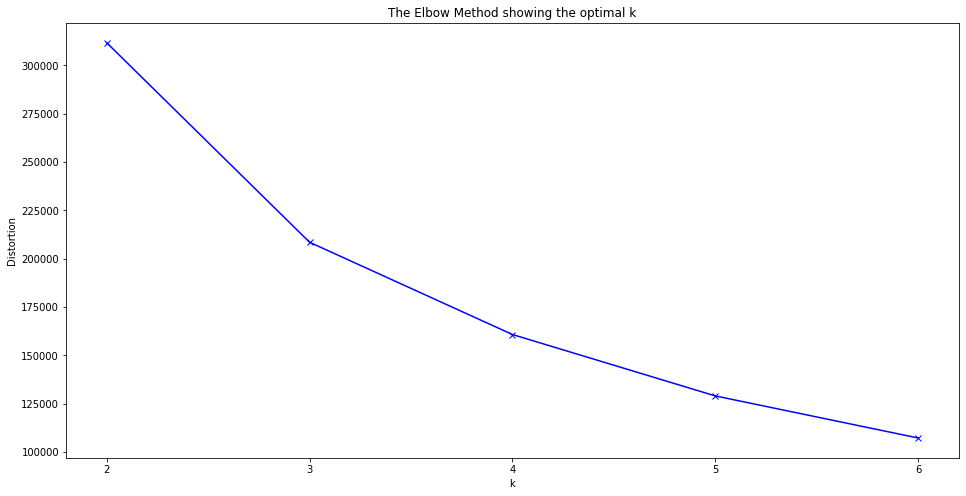

In [29]:

plt.figure(figsize=(16,8))
plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(range_n_clusters)
plt.show()

In [20]:
df.head()

,county_type,state_code,hh_urban_area,hh_urban_connect,hh_rural,hh_median_income,home_own_hh_median_income,rent_hh_median_income,income_per_person,county_gdp,home_own_white,home_own_black,home_own_native,home_own_asian,home_own_islander,home_own_other_race,home_own_2race,home_own_hispanic,home_own_age_35_lt,home_own_age_35_44,home_own_age_45_54,home_own_age_55_64,home_own_age_65_74,home_own_age_75_84,home_own_age_85_ge,home_own_ed_hs_lt,home_own_ed_hs,home_own_ed_aa_le,home_own_ed_ba_ge,home_own_yrs_00_03_lt,home_own_yrs_03_04,home_own_yrs_05_09,home_own_yrs_10_19,home_own_yrs_20_29,home_own_yrs_30_ge,rent_white,rent_black,rent_native,rent_asian,rent_islander,rent_other_race,rent_2race,rent_hispanic,rent_age_35_lt,rent_age_35_44,rent_age_45_54,rent_age_55_64,rent_age_65_74,rent_age_75_84,rent_age_85_ge,rent_ed_hs_lt,rent_ed_hs,rent_ed_aa_le,rent_ed_ba_ge,rent_yrs_00_03_lt,rent_yrs_03_04,rent_yrs_05_09,rent_yrs_10_19,rent_yrs_20_29,rent_yrs_30_ge,home_own_hh_size_1,home_own_hh_size_2,home_own_hh_size_3,home_own_hh_size_4,home_own_hh_size_5,home_own_hh_size_6,home_own_hh_size_7_ge,rent_hh_size_1,rent_hh_size_2,rent_hh_size_3,rent_hh_size_4,rent_hh_size_5,rent_hh_size_6,rent_hh_size_7_ge,home_own_hh_inc_050_075k,home_own_hh_inc_075_100k,home_own_hh_inc_100_150k,home_own_hh_inc_150k_ge,rent_hh_inc_050_075k,rent_hh_inc_075_100k,rent_hh_inc_100_150k,rent_hh_inc_150k_ge,home_own_children_present,rent_children_present,vacant_home_owned,vacant_rented,home_value_0100_0149k,home_value_0150_0199k,home_value_0200_0299k,home_value_0300_0499k,home_value_0500_0999k,home_value_1000k_GE,home_mortgage_yes,home_own_rate,home_own_inc_000_025k,home_own_hh_inc_025_050k,rent_hh_inc_000_025k,rent_hh_inc_025_050k,home_value_0000_0099k,employment_rate
0,Small,AL,12511.1800,0.0000,9059.8200,58731.0,65812.0,42519.0,44368,1737286.0,13689.0,2366,14,20,0,7,113,361.0,2001.0,2275.0,2921.0,3513.0,2744.0,1659.0,472.0,1381.0,4866.0,4572.0,4925.0,2885.0,1551.0,2388.0,4841.0,2348.0,2490.0,4315.0,1945,0,34,0,2,32,171.0,2310.0,1434.0,725.0,639.0,380.0,211.0,197.0,893.0,1820.0,1703.0,1460.0,3122.0,1308.0,1157.0,462.0,163.0,147.0,3392.0,6151.0,2820.0,1827.0,882.0,521.0,91.0,1912.0,1737.0,812.0,789.0,459.0,83.0,31.0,2772.0,2140.0,3326.0,1855.0,1216.0,894.0,574.0,210.0,4214.0,2003.0,0.0,0.0,2743.0,3123.0,3553.0,1964.0,242.0,17.0,10019.0,0.728352,2639.0,3203.0,1903.0,1276.0,4496.0,0.458337
1,Large,AL,28747.8900,18770.1000,34807.0100,56439.0,66180.0,40932.0,48270,7223316.0,56983.0,5032,361,557,0,187,585,1719.0,7208.0,7639.0,12811.0,14465.0,14700.0,7284.0,1190.0,4657.0,14303.0,22136.0,24201.0,12420.0,7317.0,11214.0,17968.0,8668.0,7710.0,14686.0,1340,103,86,0,84,106,945.0,4153.0,3579.0,3505.0,2258.0,1411.0,1264.0,858.0,1473.0,5165.0,4699.0,5691.0,9842.0,2952.0,2158.0,1243.0,641.0,192.0,17481.0,27128.0,10030.0,5594.0,3717.0,1250.0,97.0,7846.0,4142.0,2808.0,1131.0,429.0,433.0,239.0,9267.0,9878.0,10940.0,8912.0,2322.0,1091.0,2201.0,545.0,13096.0,5094.0,3.4,51.1,6324.0,11921.0,16038.0,13719.0,5865.0,1739.0,36074.0,0.793161,10113.0,16187.0,4904.0,5965.0,9691.0,0.423649
2,Small,AL,0.0000,3034.5041,6386.4959,32525.0,44900.0,17965.0,35572,834832.0,3632.0,2181,10,8,0,5,36,67.0,529.0,421.0,1034.0,1315.0,1378.0,868.0,199.0,969.0,1955.0,1671.0,1090.0,533.0,643.0,546.0,1467.0,1167.0,1345.0,1310.0,2303,0,11,0,21,50,192.0,1309.0,802.0,510.0,438.0,345.0,311.0,58.0,1227.0,1342.0,908.0,262.0,1646.0,618.0,786.0,399.0,232.0,108.0,1490.0,2436.0,770.0,681.0,212.0,110.0,12.0,1392.0,811.0,670.0,458.0,227.0,76.0,64.0,1093.0,605.0,676.0,366.0,185.0,182.0,132.0,12.0,991.0,1325.0,0.0,0.0,819.0,653.0,690.0,399.0,155.0,27.0,2593.0,0.603452,1453.0,1501.0,2177.0,987.0,2936.0,0.331630
3,Small,AL,0.0000,2198.7255,4748.2745,47542.0,55863.0,20931.0,31540,467477.0,4565.0,750,12,4,0,0,0,65.0,330.0,591.0,1237.0,1128.0,1053.0,575.0,215.0,938.0,2177.0,1178.0,806.0,439.0,456.0,622.0,1300.0,1235.0,996.0,1428.0,547,0,0,0,0,17,66.0,379.0,417.0,272.0,390.0,247.0,46.0,27.0,431.0,919.0,350.0,99.0,740.0,360.0,330.0,198.0,1

In [30]:
kmeans = KMeans(n_clusters=4, random_state=42) 

kmeans.fit(TSNE_df)
df_result = data.copy()

df_result['Cluster'] = kmeans.labels_

In [31]:
df_result.columns

Index(['bea_fips_long', 'year_of', 'state', 'county', 'pos_co', 'state_code',
       'county_type', 'housing_units', 'housing_occupied', 'housing_white',
       ...
       'home_own_rt_age_85_ge', 'home_own_rt_ed_hs_lt', 'home_own_rt_ed_hs',
       'home_own_rt_ed_aa_le', 'home_own_rt_ed_ba_ge', 'pct_county_urban_area',
       'pct_county_urban_connect', 'pct_county_rural', 'county_urban_category',
       'Cluster'],
      dtype='object', length=242)

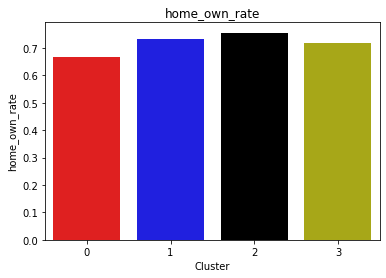

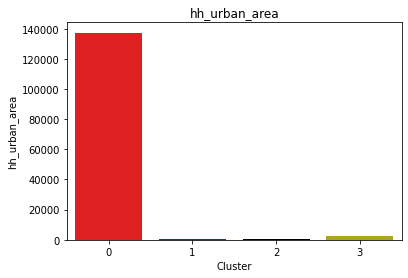

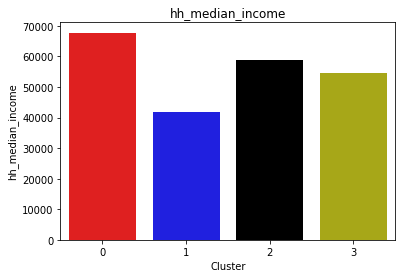

,Cluster,home_own_rate,hh_urban_area,hh_median_income
0,0,0.665039,137332.948590,67770.722212
1,1,0.731428,356.649811,41669.899983
2,2,0.755023,552.620660,58976.870093
3,3,0.719073,2335.115142,54558.200547


In [32]:
grouper = df_result.groupby(['Cluster'], as_index=False).agg(
        {'home_own_rate':'mean', 'hh_urban_area':'mean',
         'hh_median_income':'mean' })

# hue_order = ['No Engagement', 'Low', 'Mid', 'High']

pal =  ['r', 'b', 'k','y', 'm', 'c']
pl = sns.barplot(x=grouper["Cluster"], y = grouper['home_own_rate'], palette= pal)
pl.set_title("home_own_rate")
plt.show()



pl = sns.barplot(x=grouper["Cluster"], y = grouper['hh_urban_area'], palette= pal)
pl.set_title("hh_urban_area")
plt.show()


pl = sns.barplot(x=grouper["Cluster"], y = grouper['hh_median_income'], palette= pal)
pl.set_title("hh_median_income")
plt.show()


grouper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


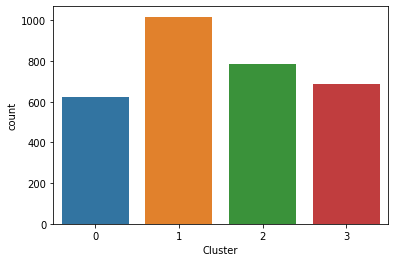

In [33]:
sns.countplot(df_result['Cluster'])

In [34]:
df_result.groupby(['Cluster', 'county_type'])['county_type'].count()

Cluster  county_type
0        Large           619
         Small             2
1        Large            13
         Small          1005
2        Large             3
         Small           783
3        Large           195
         Small           491
Name: county_type, dtype: int64

In [35]:
df_result.groupby(['Cluster', 'county_urban_category'])['county_type'].count()

Cluster  county_urban_category
0        RURAL                     23
         SUBURBAN                   1
         URBAN                    597
1        RURAL                    880
         SUBURBAN                 121
         URBAN                     17
2        RURAL                    611
         SUBURBAN                 149
         URBAN                     26
3        RURAL                    397
         SUBURBAN                 251
         URBAN                     38
Name: county_type, dtype: int64

In [37]:
def cluster_analysis(data, standardize=True, method='pca', n_components=2, n_clusters=3, plot_result=True):
    """
    args:
        data: dataframe or numpy array, data;
        standardize: boolean, whether to standardize the data;
        method: string, 'pca', 'tsne' or 'umap';
        n_components: int, no of components;
        n_clusters: int, no of clusters;
        plot_result: Boolean, whether to plot the clusters.
    return:
        an array of cluster labels for all samples
    """
    df = data.copy()
    
    # standardize the data if desired
    if standardize:
        scaler = StandardScaler()
        df = scaler.fit_transform(data)
    
    # choose dimension reduction method
    if method == 'pca':
        reduced_data = PCA(n_components=n_components).fit_transform(df)
    elif method == 'tsne':
        reduced_data = TSNE(n_components=n_components, random_state=0).fit_transform(df)
    else:
        reduced_data = UMAP(n_components=n_components, init='random', random_state=0).fit_transform(df)
    
    # fit a k-means model
    model = KMeans(init="k-means++", n_clusters=n_clusters)
    model.fit(reduced_data)
    y_pred = model.predict(reduced_data)
    
    # plot the result if desired (only for 2-d reduced data)
    if plot_result:
        if n_components != 2:
            print("...plotting is only done for 2-d reduced data!...")
        else:
            centroids = model.cluster_centers_
            centroids_x = centroids[:,0]
            centroids_y = centroids[:,1]
            
            fig = plt.figure(figsize=(8, 6))
            plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_pred, cmap='Set3')
            plt.scatter(centroids_x, centroids_y, c='red', marker='X', s=200, cmap='viridis')
            plt.title(f'K-Means Clustering Results with K={n_clusters}')
            plt.xlabel('Component 1')
            plt.ylabel('Component 2')
            plt.show()
    
    col_name = ['Component ' + str(i+1) for i in range(n_components)] + ['cluster']
    result = pd.DataFrame(np.concatenate((reduced_data, y_pred.reshape(-1, 1)), axis=1), columns=col_name)
    
    return result

In [38]:
X.head()

,hh_urban_area,hh_urban_connect,hh_rural,hh_median_income,home_own_hh_median_income,rent_hh_median_income,income_per_person,county_gdp,home_own_white,home_own_black,home_own_native,home_own_asian,home_own_islander,home_own_other_race,home_own_2race,home_own_hispanic,home_own_age_35_lt,home_own_age_35_44,home_own_age_45_54,home_own_age_55_64,home_own_age_65_74,home_own_age_75_84,home_own_age_85_ge,home_own_ed_hs_lt,home_own_ed_hs,home_own_ed_aa_le,home_own_ed_ba_ge,home_own_yrs_00_03_lt,home_own_yrs_03_04,home_own_yrs_05_09,home_own_yrs_10_19,home_own_yrs_20_29,home_own_yrs_30_ge,rent_white,rent_black,rent_native,rent_asian,rent_islander,rent_other_race,rent_2race,rent_hispanic,rent_age_35_lt,rent_age_35_44,rent_age_45_54,rent_age_55_64,rent_age_65_74,rent_age_75_84,rent_age_85_ge,rent_ed_hs_lt,rent_ed_hs,rent_ed_aa_le,rent_ed_ba_ge,rent_yrs_00_03_lt,rent_yrs_03_04,rent_yrs_05_09,rent_yrs_10_19,rent_yrs_20_29,rent_yrs_30_ge,home_own_hh_size_1,home_own_hh_size_2,home_own_hh_size_3,home_own_hh_size_4,home_own_hh_size_5,home_own_hh_size_6,home_own_hh_size_7_ge,rent_hh_size_1,rent_hh_size_2,rent_hh_size_3,rent_hh_size_4,rent_hh_size_5,rent_hh_size_6,rent_hh_size_7_ge,home_own_hh_inc_050_075k,home_own_hh_inc_075_100k,home_own_hh_inc_100_150k,home_own_hh_inc_150k_ge,rent_hh_inc_050_075k,rent_hh_inc_075_100k,rent_hh_inc_100_150k,rent_hh_inc_150k_ge,home_own_children_present,rent_children_present,vacant_home_owned,vacant_rented,home_value_0100_0149k,home_value_0150_0199k,home_value_0200_0299k,home_value_0300_0499k,home_value_0500_0999k,home_value_1000k_GE,home_mortgage_yes,home_own_inc_000_025k,home_own_hh_inc_025_050k,rent_hh_inc_000_025k,rent_hh_inc_025_050k,home_value_0000_0099k,employment_rate
0,12511.1800,0.0000,9059.8200,58731.0,65812.0,42519.0,44368,1737286.0,13689.0,2366,14,20,0,7,113,361.0,2001.0,2275.0,2921.0,3513.0,2744.0,1659.0,472.0,1381.0,4866.0,4572.0,4925.0,2885.0,1551.0,2388.0,4841.0,2348.0,2490.0,4315.0,1945,0,34,0,2,32,171.0,2310.0,1434.0,725.0,639.0,380.0,211.0,197.0,893.0,1820.0,1703.0,1460.0,3122.0,1308.0,1157.0,462.0,163.0,147.0,3392.0,6151.0,2820.0,1827.0,882.0,521.0,91.0,1912.0,1737.0,812.0,789.0,459.0,83.0,31.0,2772.0,2140.0,3326.0,1855.0,1216.0,894.0,574.0,210.0,4214.0,2003.0,0.0,0.0,2743.0,3123.0,3553.0,1964.0,242.0,17.0,10019.0,2639.0,3203.0,1903.0,1276.0,4496.0,0.458337
1,28747.8900,18770.1000,34807.0100,56439.0,66180.0,40932.0,48270,7223316.0,56983.0,5032,361,557,0,187,585,1719.0,7208.0,7639.0,12811.0,14465.0,14700.0,7284.0,1190.0,4657.0,14303.0,22136.0,24201.0,12420.0,7317.0,11214.0,17968.0,8668.0,7710.0,14686.0,1340,103,86,0,84,106,945.0,4153.0,3579.0,3505.0,2258.0,1411.0,1264.0,858.0,1473.0,5165.0,4699.0,5691.0,9842.0,2952.0,2158.0,1243.0,641.0,192.0,17481.0,27128.0,10030.0,5594.0,3717.0,1250.0,97.0,7846.0,4142.0,2808.0,1131.0,429.0,433.0,239.0,9267.0,9878.0,10940.0,8912.0,2322.0,1091.0,2201.0,545.0,13096.0,5094.0,3.4,51.1,6324.0,11921.0,16038.0,13719.0,5865.0,1739.0,36074.0,10113.0,16187.0,4904.0,5965.0,9691.0,0.423649
2,0.0000,3034.5041,6386.4959,32525.0,44900.0,17965.0,35572,834832.0,3632.0,2181,10,8,0,5,36,67.0,529.0,421.0,1034.0,1315.0,1378.0,868.0,199.0,969.0,1955.0,1671.0,1090.0,533.0,643.0,546.0,1467.0,1167.0,1345.0,1310.0,2303,0,11,0,21,50,192.0,1309.0,802.0,510.0,438.0,345.0,311.0,58.0,1227.0,1342.0,908.0,262.0,1646.0,618.0,786.0,399.0,232.0,108.0,1490.0,2436.0,770.0,681.0,212.0,110.0,12.0,1392.0,811.0,670.0,458.0,227.0,76.0,64.0,1093.0,605.0,676.0,366.0,185.0,182.0,132.0,12.0,991.0,1325.0,0.0,0.0,819.0,653.0,690.0,399.0,155.0,27.0,2593.0,1453.0,1501.0,2177.0,987.0,2936.0,0.331630
3,0.0000,2198.7255,4748.2745,47542.0,55863.0,20931.0,31540,467477.0,4565.0,750,12,4,0,0,0,65.0,330.0,591.0,1237.0,1128.0,1053.0,575.0,215.0,938.0,2177.0,1178.0,806.0,439.0,456.0,622.0,1300.0,1235.0,996.0,1428.0,547,0,0,0,0,17,66.0,379.0,417.0,272.0,390.0,247.0,46.0,27.0,431.0,919.0,350.0,99.0,740.0,360.0,330.0,198.0,126.0,62.0,1185.0,2041.0,789.0,718.0,232.0,73.0,90.0,717.0,466.0,261.0,203.0,50.0,78.0,28.0,1003.0,88

In [ ]:
methods = ['nmf', 'tsne', 'pca']

n_clusters = [2,3,4,5]
n_coms = [2,4,6,8,10]

for m in methods:
    

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


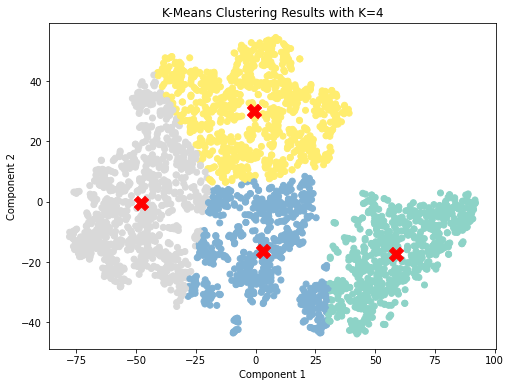

In [39]:
result2_cluster = cluster_analysis(X, method='tsne', n_components=2, n_clusters=4)

In [ ]:
result2_cluster[result2_cluster['cluster']==3]

,Component 1,Component 2,cluster
201,242.269263,70.556921,3.0


In [40]:
result2_cluster.shape

(3111, 3)

In [42]:
result2_cluster.head()

,Component 1,Component 2,cluster
0,10.746116,9.640161,3.0
1,54.159466,-40.677856,0.0
2,-58.760891,-20.174837,2.0
3,-51.914135,2.032488,2.0
4,-18.998968,-31.329380,1.0


In [41]:
data.shape

(3111, 241)

In [44]:
df_result = data.copy()

df_result['Cluster'] = result2_cluster['cluster']